In [9]:
import numpy as np

# Load Sinhala and English sentences from text files
with open("dataset/sinhala.txt", "r", encoding="utf-8") as f:
    sinhala_sentences = f.readlines()

with open("dataset/english.txt", "r", encoding="utf-8") as f:
    english_sentences = f.readlines()

# Calculate sentence lengths (in words)
sinhala_lengths = [len(sentence.split()) for sentence in sinhala_sentences]
english_lengths = [len(sentence.split()) for sentence in english_sentences]


In [10]:
# Calculate sentence length differences
length_differences = np.array(sinhala_lengths) - np.array(english_lengths)

In [11]:
from scipy.stats import norm

# Calculate mean and standard deviation of the differences
mean_diff = np.mean(length_differences)
std_diff = np.std(length_differences)

# Fit a normal distribution
gaussian_fit = norm(loc=mean_diff, scale=std_diff)


In [12]:
def alignment_probability(diff, gaussian_fit):
    # Return the probability of observing the difference 'diff'
    return gaussian_fit.pdf(diff)

# Compute alignment probabilities for each pair
alignment_probs = [alignment_probability(diff, gaussian_fit) for diff in length_differences]


In [13]:
def alignment_probability(diff, gaussian_fit):
    # Return the probability of observing the difference 'diff'
    return gaussian_fit.pdf(diff)

# Compute alignment probabilities for each pair
alignment_probs = [alignment_probability(diff, gaussian_fit) for diff in length_differences]


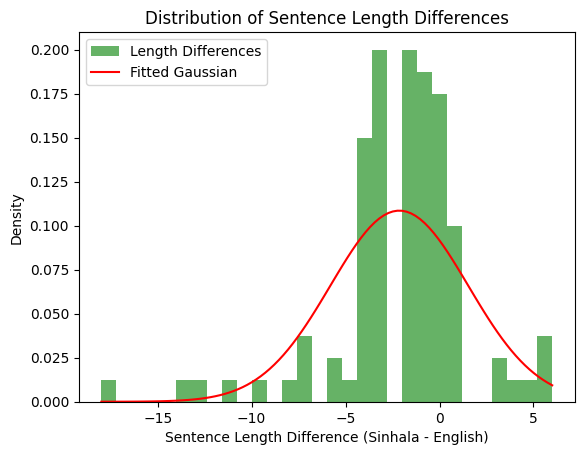

In [14]:
import matplotlib.pyplot as plt

# Plot histogram of length differences
plt.hist(length_differences, bins=30, density=True, alpha=0.6, color='g', label="Length Differences")

# Plot Gaussian curve
x = np.linspace(min(length_differences), max(length_differences), 100)
plt.plot(x, gaussian_fit.pdf(x), 'r', label="Fitted Gaussian")

plt.title('Distribution of Sentence Length Differences')
plt.xlabel('Sentence Length Difference (Sinhala - English)')
plt.ylabel('Density')
plt.legend()
plt.show()


In [30]:
import math

# Gale-Church alignment algorithm implementation
def gale_church(sinhala_sentences, english_sentences):
    sinhala_lens = [len(sentence.split()) for sentence in sinhala_sentences]  # Word count
    english_lens = [len(sentence.split()) for sentence in english_sentences]

    n = len(sinhala_lens)
    m = len(english_lens)
    
    dp = [[float('inf')] * (m + 1) for _ in range(n + 1)]
    dp[0][0] = 0
    
    backpointer = [[None] * (m + 1) for _ in range(n + 1)]

    # Iterate over all sentence pairs and compute Z-scores
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            length_diff = sinhala_lens[i - 1] - english_lens[j - 1]
            z_score = abs(length_diff) / math.sqrt(sinhala_lens[i - 1] + english_lens[j - 1])
            prob_score = -math.log(math.exp(-z_score**2 / 2))

            # Update DP table with alignment costs
            if dp[i - 1][j - 1] + prob_score < dp[i][j]:
                dp[i][j] = dp[i - 1][j - 1] + prob_score
                backpointer[i][j] = (i - 1, j - 1)

    # Backtrack to find the best alignment path
    aligned_pairs = []
    i, j = n, m
    while i > 0 and j > 0:
        prev_i, prev_j = backpointer[i][j]
        aligned_pairs.append((sinhala_sentences[prev_i], english_sentences[prev_j]))
        i, j = prev_i, prev_j

    return aligned_pairs[::-1]  # Reverse to get the original order

# Perform sentence alignment
aligned_sentences = gale_church(sinhala_sentences, english_sentences)

# Output aligned sentence pairs
print("Aligned Sinhala-English sentence pairs:")
for pair in aligned_sentences[:25]:
    print(f"Sinhala: {pair[0]}\nEnglish: {pair[1]}\n")


Aligned Sinhala-English sentence pairs:
Sinhala: තරගමාලාව පාකිස්තානය ජය ගත්තේය.

English: Pakistan won the series.


Sinhala: තරගාවලිය අවසන් වීමෙන් පසු පකිස්තාන නායක සර්ෆ්‍රාස් අහමඩ් ප්‍රකාශ කළේ ඉදිරියේදී කිසිදු කණ්ඩායමක් ආරක්ෂාව පිළිබඳ කරුණු නිදහසට කරුණක් ලෙස භාවිත නොකරන බවයි.

English: Following the conclusion of the series, Pakistans captain Sarfraz Ahmed said that no team will be using security concerns as an excuse in the future.


Sinhala: මේ වසරේ හෝ ලබන වසරේ ජාත්‍යන්තර ක්‍රිකට් නැවත පාකිස්තානයට පැමිණෙනු ඇත.

English: This year or the next year, international cricket will come back to Pakistan.


Sinhala: ශ්‍රී ලංකා ක්‍රිකට් කණ්ඩායමට එල්ල වූ ප්‍රහාරයකින් පසුව එම තරගාවලිය කෙටි විය.

English: That series was cut short, following an attack on the Sri Lanka cricket team.


Sinhala: බටහිර ඉන්දීය කොදෙව් පිලේ නායකයා ලෙස ජේසන් මොහොමඩ් නම් කෙරුණු අතර නිත්‍ය විස්සයි20 නායකයා ලෙස කාලෝස් බ්‍රැත්වේට් ආරක්ෂක හේතුන් මත සංචාරය නොකළේය.

English: Jason Mohammed was named as captain of the West Ind